In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json

sns.set_style("whitegrid")

In [143]:
results_1k = pd.DataFrame({
    "Model":    ["Pseudobulk", "CT Prop", "Cell-level", "scAGG", "scAGG+GAT", "scAGG+AP", "scAGG+GAT+AP"],
    "Genes":    [1000,   1000, 1000,   1000, 1000, 1000, 1000],
    "Acc":      [0.7100, 0.6389, 0.5989, 0.71, 0.67, 0.74, 0.66],
    "Acc_std":  [0.0293, 0.0313, 0.0309, 0.07, 0.07, 0.06, 0.08],
    "Prec":     [0.7425, 0.6598, 0.6176, 0.73, 0.68, 0.74, 0.65],
    "Prec_std": [0.0305, 0.0273, 0.0242, 0.07, 0.08, 0.08, 0.06],
    "Rec":      [0.7413, 0.7543, 0.7662, 0.81, 0.81, 0.83, 0.88],
    "Rec_std":  [0.0334, 0.0374, 0.0242, 0.07, 0.04, 0.05, 0.10],
    "F1":       [0.7421, 0.6990, 0.6677, 0.76, 0.74, 0.78, 0.75],
    "F1_std":   [0.0275, 0.0285, 0.0445, 0.06, 0.04, 0.05, 0.06],
    "AUC":      [0.7744, 0.6810, 0.6325, 0.79, 0.78, 0.79, 0.78],
    "AUC_std":  [0.0234, 0.0289, 0.0120, 0.10, 0.10, 0.10, 0.10],
})

results_2k = pd.DataFrame({
    "Model":    ["Pseudobulk", "CT Prop", "Cell-level", "scAGG", "scAGG+GAT", "scAGG+AP", "scAGG+GAT+AP"],
    "Genes":    [2000,   2000, 2000,   2000, 2000, 2000, 2000],
    "Acc":      [0.7189, 0.6389, 0.5568, 0.6835, 0, 0, 0],
    "Acc_std":  [0.0276, 0.0313, 0.0111, 0.0775, 0, 0, 0],
    "Prec":     [0.7474, 0.6598, 0.5694, 0.6871, 0, 0, 0],
    "Prec_std": [0.0279, 0.0273, 0.0124, 0.0675, 0, 0, 0],
    "Rec":      [0.7662, 0.7543, 0.8934, 0.8257, 0, 0, 0],
    "Rec_std":  [0.0366, 0.0374, 0.0451, 0.0740, 0, 0, 0],
    "F1":       [0.7515, 0.6990, 0.6872, 0.7483, 0, 0, 0],
    "F1_std":   [0.0264, 0.0285, 0.0140, 0.0608, 0, 0, 0],
    "AUC":      [0.7842, 0.6810, 0.5219, 0.7607, 0, 0, 0],
    "AUC_std":  [0.0248, 0.0289, 0.0201, 0.1283, 0, 0, 0],
})

results_5k = pd.DataFrame({
    "Model":    ["Pseudobulk", "CT Prop", "Cell-level", "scAGG", "scAGG+GAT", "scAGG+AP", "scAGG+GAT+AP"],
    "Genes":    [5000,   5000, 5000, 5000, 5000, 5000, 5000],
    "Acc":      [0.7291, 0.6389, 0.5949, 0.71, 0.72, 0.75, 0.70],
    "Acc_std":  [0.0279, 0.0313, 0.0119, 0.12, 0.15, 0.12, 0.13],
    "Prec":     [0.7536, 0.6598, 0.6003, 0.72, 0.74, 0.77, 0.71],
    "Prec_std": [0.0267, 0.0273, 0.0111, 0.11, 0.14, 0.12, 0.11],
    "Rec":      [0.7814, 0.7543, 0.8609, 0.85, 0.83, 0.80, 0.80],
    "Rec_std":  [0.0362, 0.0374, 0.0436, 0.07, 0.05, 0.09, 0.09],
    "F1":       [0.7625, 0.6990, 0.7006, 0.78, 0.78, 0.78, 0.75],
    "F1_std":   [0.0261, 0.0285, 0.0146, 0.09, 0.10, 0.10, 0.10],
    "AUC":      [0.7935, 0.6810, 0.5764, 0.78, 0.77, 0.77, 0.77],
    "AUC_std":  [0.0293, 0.0289, 0.0200, 0.14, 0.15, 0.13, 0.14],
})

results_8k = pd.DataFrame({
    "Model":    ["Pseudobulk", "CT Prop", "Cell-level", "scAGG", "scAGG+GAT", "scAGG+AP", "scAGG+GAT+AP"],
    "Genes":    [8000,   8000, 8000, 8000, 8000, 8000, 8000],
    "Acc":      [0.7353, 0.6389, 0, 0.6909, 0, 0, 0],
    "Acc_std":  [0.0303, 0.0313, 0, 0.1214, 0, 0, 0],
    "Prec":     [0.7537, 0.6598, 0, 0.6961, 0, 0, 0],
    "Prec_std": [0.0294, 0.0273, 0, 0.0980, 0, 0, 0],
    "Rec":      [0.7962, 0.7543, 0, 0.8015, 0, 0, 0],
    "Rec_std":  [0.0344, 0.0374, 0, 0.1284, 0, 0, 0],
    "F1":       [0.7700, 0.6990, 0, 0.7446, 0, 0, 0],
    "F1_std":   [0.0269, 0.0285, 0, 0.1105, 0, 0, 0],
    "AUC":      [0.8080, 0.6810, 0, 0.7743, 0, 0, 0],
    "AUC_std":  [0.0248, 0.0289, 0, 0.1445, 0, 0, 0],
})

# Add scRAT results
scRAT_1k = pd.Series({
    "Model": "scRAT",
    "Genes": 1000,
    "Acc": 0.6379,
    "Acc_std": 0.0717,
    "Rec": 0.6840,
    "Rec_std": 0.0733,
    "Prec": 0.6817,
    "Prec_std": 0.0968,
    "F1": 0.6828,
    "F1_std": 0.0104,
    "AUC": 0.6787,
    "AUC_std": 0.1030,
})
results_1k.loc[results_1k.shape[0]] = scRAT_1k

scRAT_5k = pd.Series({
    "Model": "scRAT",
    "Genes": 5000,
    "Acc": 0.6710,
    "Acc_std": 0.0627,
    "Prec": 0.7202,
    "Prec_std": 0.1107,
    "Rec": 0.7254,
    "Rec_std": 0.0948,
    "F1": 0.7228,
    "F1_std": 0.0145,
    "AUC": 0.7265,
    "AUC_std": 0.0850,
})
results_5k.loc[results_5k.shape[0]] = scRAT_5k

res_cts = pd.DataFrame({
    "Celltype": ["All", "Neuronal", "Non-neuronal", "Astrocytes", "Excitatory", "Immune Cells", "Inhibitory", "Oligodendrocytes", "OPCs", "Vasculature"],
    "Accuracy":      [0.7198, 0.7050, 0.6847, 0.7556, 0.7339, 0.7561, 0.6696, 0.6915, 0.7347, 0.6333],
    "Accuracy_std":  [0.0678, 0.0762, 0.1405, 0.0822, 0.0831, 0.0958, 0.0841, 0.0957, 0.0643, 0.1130],
    "Precision":     [0.7291, 0.7566, 0.7152, 0.7867, 0.7436, 0.7853, 0.6878, 0.7344, 0.7511, 0.6927],
    "Precision_std": [0.0727, 0.1333, 0.1388, 0.0970, 0.0949, 0.0971, 0.0786, 0.1184, 0.0863, 0.1107],
    "Recall":      [0.8067, 0.7583, 0.7833, 0.7942, 0.8192, 0.7825, 0.7683, 0.7708, 0.8225, 0.6658],
    "Recall_std":  [0.0718, 0.0792, 0.0753, 0.0501, 0.0529, 0.0750, 0.1035, 0.1067, 0.0900, 0.1531],
    "F1":       [0.7634, 0.7449, 0.7418, 0.7866, 0.7770, 0.7833, 0.7216, 0.7387, 0.7775, 0.6664],
    "F1_std":   [0.0568, 0.0495, 0.0979, 0.0613, 0.0656, 0.0840, 0.0717, 0.0675, 0.0464, 0.0980],
    "AUC":      [0.7862, 0.7750, 0.7689, 0.8437, 0.8056, 0.8364, 0.7580, 0.7605, 0.8100, 0.7048],
    "AUC_std":  [0.1006, 0.0933, 0.1127, 0.0627, 0.0936, 0.0993, 0.0770, 0.1123, 0.0541, 0.1059],
    # "Abundance": [6010.26, 3331.91, 2678.35, 403.66, 2400.67, 232.33, 931.24, 1745.88, 246.60, 49.88],
    # "Abundance_std": [2889.02, 2177.54, 1333.08, 266.73, 1762.21, 138.69, 523.09, 1118.51, 137.05, 39.86], 
    "Abundance": [1.00, 0.53, 0.47, 0.07, 0.38, 0.04, 0.16, 0.31, 0.04, 0.01],
    "Abundance_std": [0, 0.15, 0.15, 0.03, 0.13, 0.02, 0.05, 0.16, 0.01, 0.01],
})

res_cts = res_cts.iloc[[0, 1, 4, 6, 2, 3, 5, 7, 8, 9]]
res_cts.reset_index(inplace=True, drop=True)

In [10]:
def parse_performance_json(exp_name: str):
    with open(f"out/results/{exp_name}.json", "r") as f:
        data = json.load(f)

    dfs = {}
    for model in data.keys():
        print(f"Model: {model} -> {len(data[model])} folds")

        df = pd.DataFrame(data[model])
        df["model"] = model

        df = df[["model", "fold", "accuracy", "precision", "recall", "f1", "roc_auc"]]

        dfs[model] = df
        # dfs[model]["model"] = model
        # dfs[model]["exp_name"] = exp_name

    df = pd.concat(dfs, axis=0)
    return df

# Main results figure

In [91]:
palette = sns.color_palette(
    ['#fc8d62', '#8da0cb', '#ffd92f',  '#e78ac3', '#a6d854', '#e5c494', '#b3b3b3', "#F6A729", '#66c2a5']
)
palette

[(0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
 (0.9647058823529412, 0.6549019607843137, 0.1607843137254902),
 (0.4, 0.7607843137254902, 0.6470588235294118)]

In [169]:
df_combat

model  fold  accuracy  precision    recall        f1  \
CTCC         0       CT Prop     0  0.535714   0.666667  0.631579  0.648649   
             1       CT Prop     1  0.607143   0.666667  0.842105  0.744186   
             2       CT Prop     2  0.535714   0.650000  0.684211  0.666667   
             3       CT Prop     3  0.607143   0.666667  0.777778  0.717949   
             4       CT Prop     4  0.535714   0.619048  0.722222  0.666667   
Pseudobulk   0    Pseudobulk     0  0.892857   0.900000  0.947368  0.923077   
             1    Pseudobulk     1  0.964286   0.950000  1.000000  0.974359   
             2    Pseudobulk     2  0.928571   0.904762  1.000000  0.950000   
             3    Pseudobulk     3  0.892857   0.857143  1.000000  0.923077   
             4    Pseudobulk     4  0.892857   0.857143  1.000000  0.923077   
scAGG        0         scAGG     0  0.928571   0.904762  1.000000  0.950000   
             1         scAGG     1  0.964286   0.950000  1.000000  0.974359   
             2         scAGG     2  0.857143   0.826087  1.000000  0.904762   
             3         scAGG     3  0.857143   0.850000  0.944444  0.894737   
             4         scAGG     4  0.892857   0.857143  1.000000  0.923077   
scAGG+GAT    0     scAGG+GAT     0  0.964286   1.000000  0.947368  0.972973   
             1     scAGG+GAT     1  1.000000   1.000000  1.000000  1.000000   
             2     scAGG+GAT     2  1.000000   1.000000  1.000000  1.000000   
             3     scAGG+GAT     3  0.964286   1.000000  0.944444  0.971429   
             4     scAGG+GAT     4  0.964286   0.947368  1.000000  0.972973   
scAGG+GAT+AP 0  scAGG+GAT+AP     0  0.964286   1.000000  0.947368  0.972973   
             1  scAGG+GAT+AP     1  0.964286   1.000000  0.947368  0.972973   
             2  scAGG+GAT+AP     2  1.000000   1.000000  1.000000  1.000000   
             3  scAGG+GAT+AP     3  0.964286   1.000000  0.944444  0.971429   
             4  scAGG+GAT+AP     4  0.964286   0.947368  1.000000  0.972973   
scAGG+AP     0      scAGG+AP     0  0.928571   0.904762  1.000000  0.950000   
             1      scAGG+AP     1  0.964286   0.950000  1.000000  0.974359   
             2      scAGG+AP     2  0.857143   0.826087  1.000000  0.904762   
             3      scAGG+AP     3  0.892857   0.894737  0.944444  0.918919   
             4      scAGG+AP     4  0.892857   0.857143  1.000000  0.923077   
scRAT        0         scRAT     0  0.964286   0.909091  1.000000  0.952381   
             1         scRAT     1  0.857143   0.818182  0.818182  0.818182   
             2         scRAT     2  0.925926   0.888889  0.888889  0.888889   
             3         scRAT     3  0.888889   1.000000  0.666667  0.800000   
             4         scRAT     4  0.925926   0.857143  0.857143  0.857143   
Cell-level   0    Cell-level     0  0.821429   0.850000  0.894737  0.871795   
             1    Cell-level     1  0.964286   0.950000  1.000000  0.974359   
             2    Cell-level     2  0.892857   0.863636  1.000000  0.926829   
             3    Cell-level     3  0.964286   0.947368  1.000000  0.972973   
             4    Cell-level     4  0.821429   0.809524  0.944444  0.871795   

                 roc_auc  
CTCC         0  0.450292  
             1  0.415205  
             2  0.502924  
             3  0.533333  
             4  0.500000  
Pseudobulk   0  0.982456  
             1  0.970760  
             2  0.970760  
             3  0.955556  
             4  1.000000  
scAGG        0  0.994152  
             1  1.000000  
             2  0.976608  
             3  0.977778  
             4  0.983333  
scAGG+GAT    0  0.994152  
             1  1.000000  
             2  1.000000  
             3  0.988889  
             4  0.994444  
scAGG+GAT+AP 0  1.000000  
             1  0.994152  
             2  1.000000  
             3  0.988889  
             4  0.983333  
scAGG+AP     0  1.000000  
             1  0.994152  
             2  0.982456  


C:\Users\timo\AppData\Local\Temp\ipykernel_13104\307658496.py:24: UserWarning: The palette list has more values (9) than needed (8), which may not be intended.
  sns.barplot(x=metric, y="Model", data=results_1k, ax=axs[0, i], hue="Model", palette=palette, hue_order=hue_order)
C:\Users\timo\AppData\Local\Temp\ipykernel_13104\307658496.py:24: UserWarning: The palette list has more values (9) than needed (8), which may not be intended.
  sns.barplot(x=metric, y="Model", data=results_1k, ax=axs[0, i], hue="Model", palette=palette, hue_order=hue_order)
C:\Users\timo\AppData\Local\Temp\ipykernel_13104\307658496.py:24: UserWarning: The palette list has more values (9) than needed (8), which may not be intended.
  sns.barplot(x=metric, y="Model", data=results_1k, ax=axs[0, i], hue="Model", palette=palette, hue_order=hue_order)
C:\Users\timo\AppData\Local\Temp\ipykernel_13104\307658496.py:24: UserWarning: The palette list has more values (9) than needed (8), which may not be intended.
  sns.bar

Using color: (0.4, 0.7607843137254902, 0.6470588235294118)
Using color: (0.4, 0.7607843137254902, 0.6470588235294118)
Model: Cell-level -> 1 folds
Model: Pseudobulk -> 1 folds
Model: scRAT -> 1 folds
Model: scAGG -> 1 folds
Model: scAGG+GAT -> 1 folds
Model: scAGG+GAT+AP -> 1 folds
Model: scAGG+AP -> 1 folds
Model: CTCC -> 5 folds
Model: Pseudobulk -> 5 folds
Model: scAGG -> 5 folds
Model: scAGG+GAT -> 5 folds
Model: scAGG+GAT+AP -> 5 folds
Model: scAGG+AP -> 5 folds
Model: scRAT -> 5 folds
Model: Cell-level -> 5 folds
CT Prop
Cell-level
Pseudobulk
scAGG
scAGG+AP
scAGG+GAT
scAGG+GAT+AP
scRAT


C:\Users\timo\AppData\Local\Temp\ipykernel_13104\307658496.py:166: UserWarning: The palette list has more values (9) than needed (8), which may not be intended.
  sns.barplot(x="roc_auc_mean", y="model", data=combat_auc, ax=ax, hue="model", palette=palette, legend=False, hue_order=hue_order)


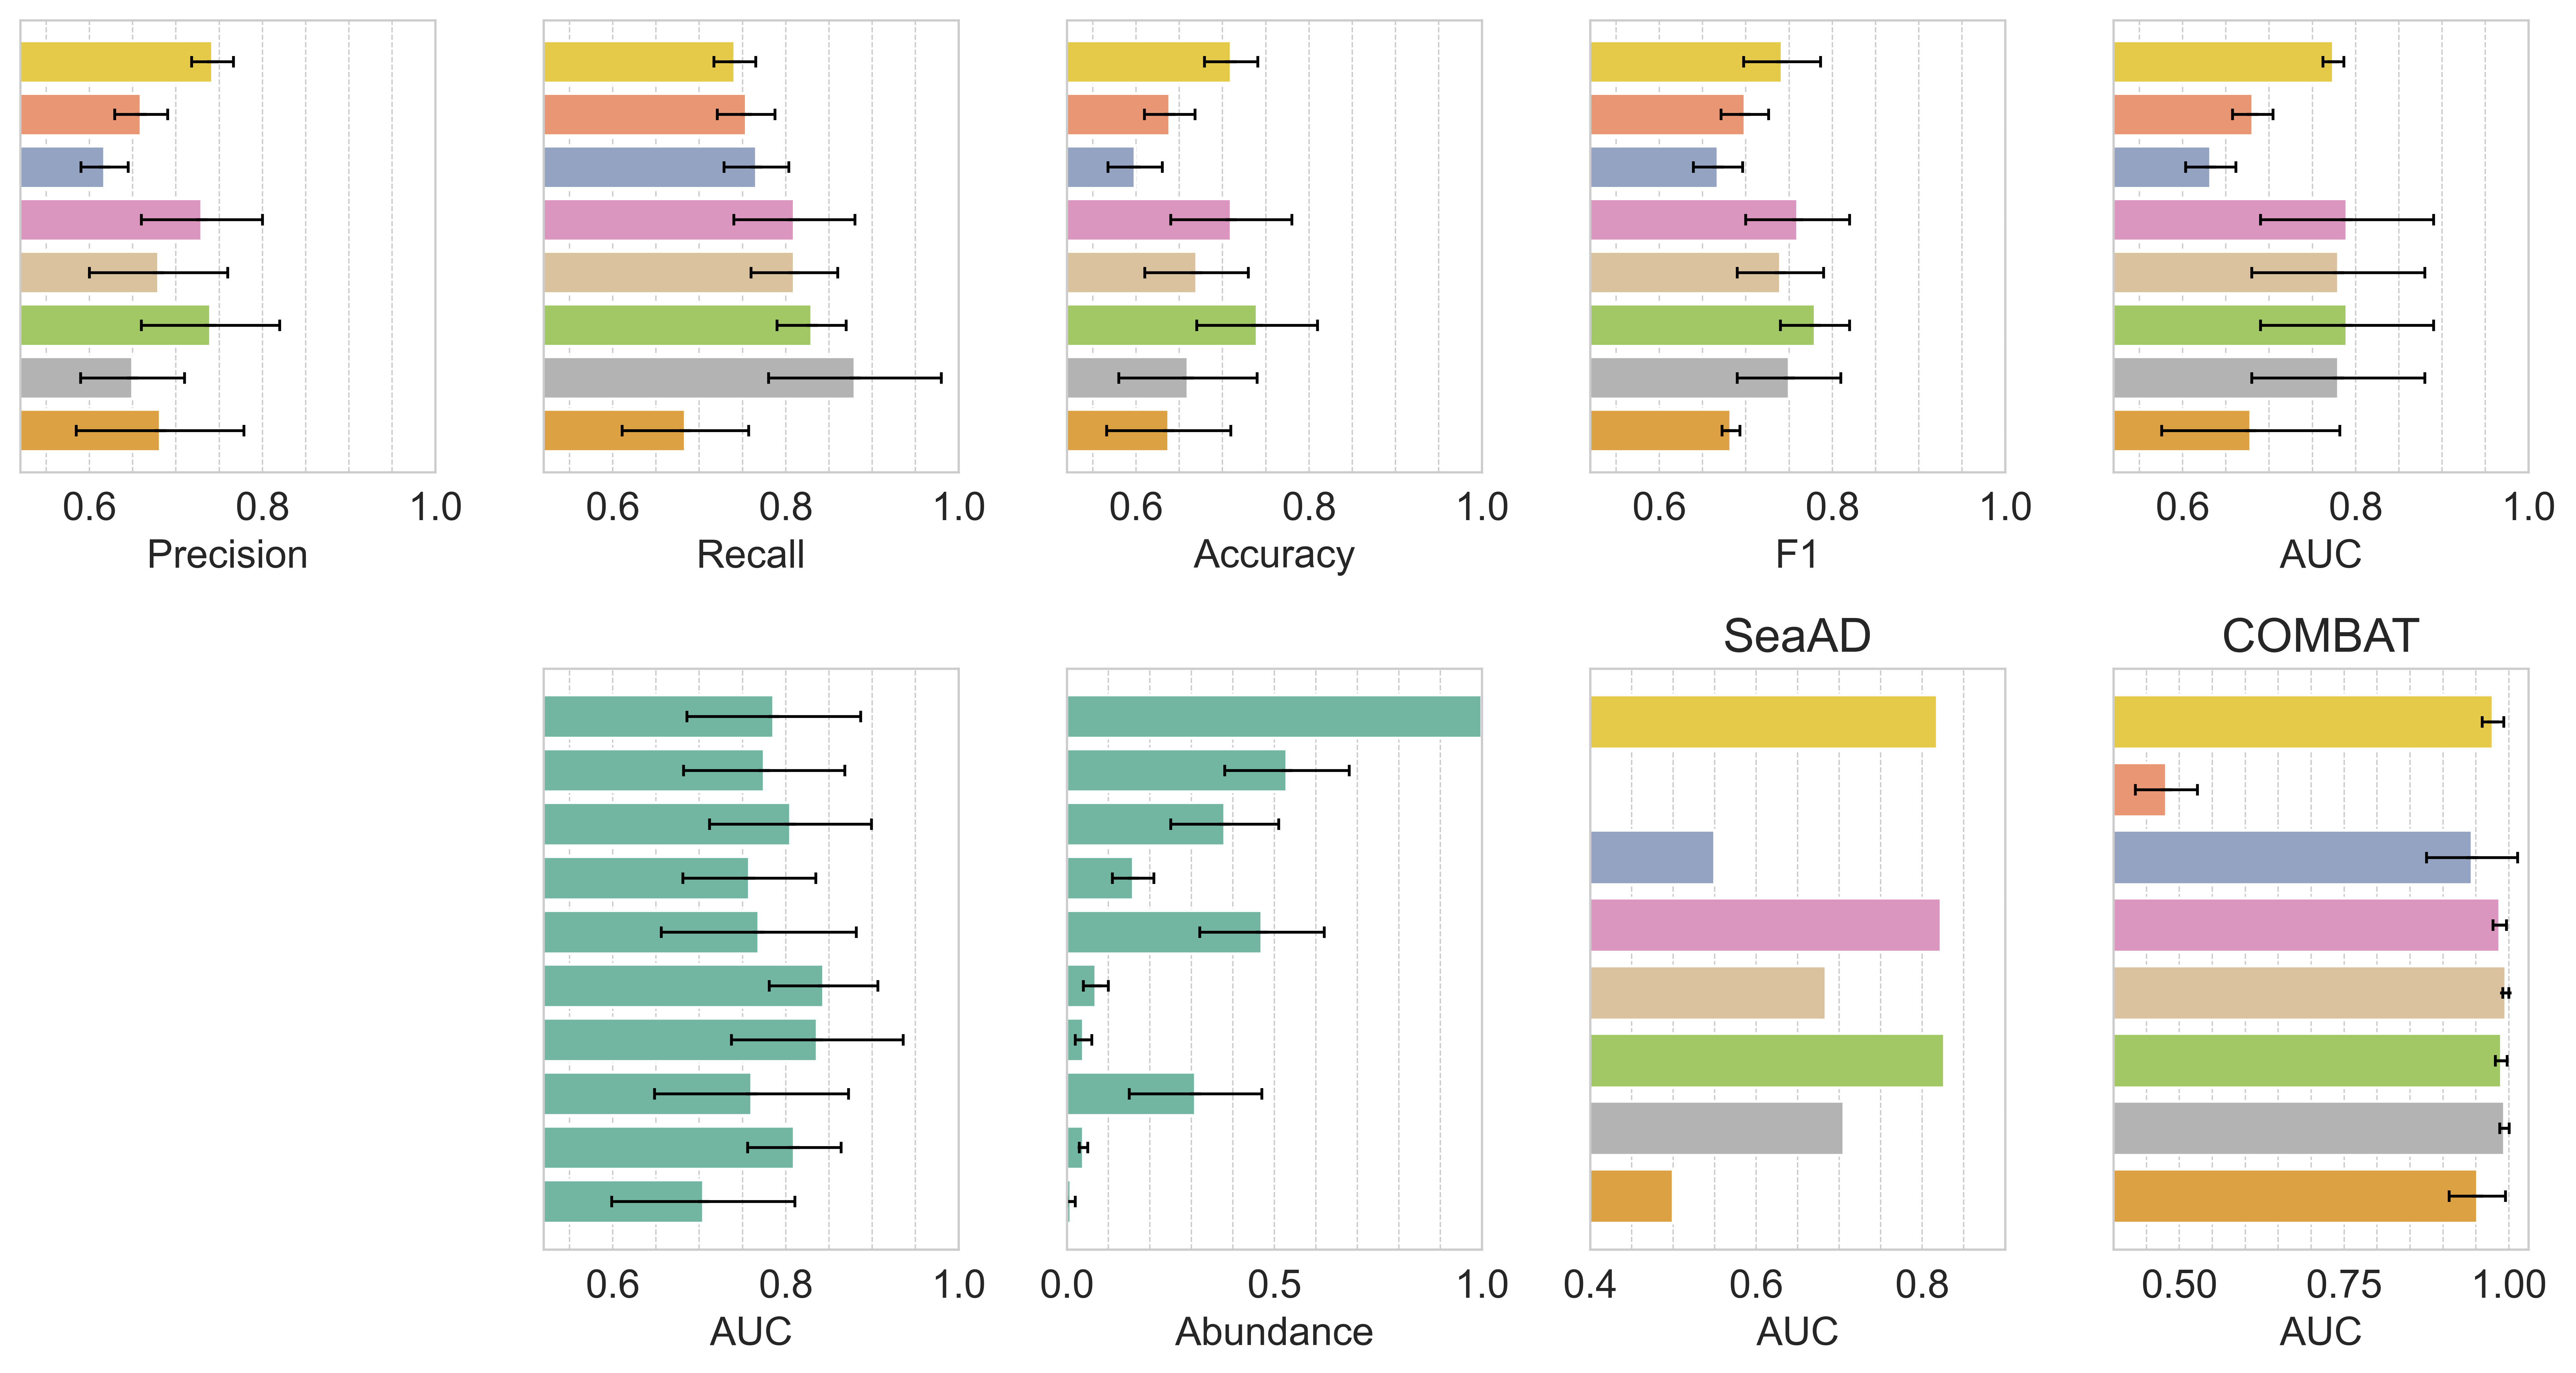

In [175]:
hue_order = sorted(results_1k["Model"].unique())

fig, axs = plt.subplots(2, 5, figsize=(13, 7), sharey=False, dpi=600, height_ratios=[7, 9])

axs[0, 1].sharey(axs[0, 0])
axs[0, 2].sharey(axs[0, 0])
axs[0, 3].sharey(axs[0, 0])
axs[0, 4].sharey(axs[0, 0])
axs[1, 3].sharey(axs[0, 0])
axs[1, 4].sharey(axs[0, 0])

axs[1, 1].sharey(axs[1, 2])

# First row: 1k genes
METRICS_VALS = [
    "Prec",
    "Rec",
    "Acc",
    "F1",
    "AUC",
]

for i, metric in enumerate(METRICS_VALS):
    sns.barplot(x=metric, y="Model", data=results_1k, ax=axs[0, i], hue="Model", palette=palette, hue_order=hue_order)
    axs[0, i].set_xlim(0.52, 1)
    axs[0, i].set_xlabel({
        "Acc": "Accuracy",
        "Prec": "Precision",
        "Rec": "Recall",
        "F1": "F1",
        "AUC": "AUC",
    }[metric])

    # error bars
    for bar, std in zip(axs[0, i].patches, results_1k[f"{metric}_std"]):
        # bar.set_x(bar.get_x() + bar.get_width() / 2)
        axs[0, i].errorbar(
            bar.get_width(), bar.get_y() + bar.get_height() / 2, xerr=std, yerr=0,
            fmt=' ', ecolor='k', capsize=2, linewidth=1,
        )

    axs[0, i].grid(axis="x", linestyle="--", linewidth=0.5, which="minor")
    axs[0, i].grid(axis="x", linestyle="--", linewidth=0.5, which="major")
    axs[0, i].minorticks_on()

axs[0, 1].tick_params(labelleft=False)
axs[0, 2].tick_params(labelleft=False)
axs[0, 3].tick_params(labelleft=False)
axs[0, 4].tick_params(labelleft=False)


# Second row: celltypes
METRICS_VALS = ["AUC", "Abundance"]
# palette = sns.color_palette("Set2", n_colors=10)
for i, metric in enumerate(METRICS_VALS):

    ax = axs[1, i+1]

    # make everything the last color in the palette
    color = palette[-1]
    print(f"Using color: {color}")
    ct_palette = [color] * len(res_cts)

    sns.barplot(x=metric, y="Celltype", data=res_cts, ax=ax, hue="Celltype", palette=ct_palette, legend=False)

    if metric != "Abundance":
        ax.set_xlim(0.52, 1)

        ax.grid(axis="x", linestyle="--", linewidth=0.5, which="major")
        ax.grid(axis="x", linestyle="--", linewidth=0.5, which="minor")
        ax.minorticks_on()

    else:
        ax.set_xlim(0, 1)
    # axs[i].set_xlabel("")

        ax.grid(axis="x", linestyle="--", linewidth=0.5, which="both")
        ax.minorticks_on()

    # error bars
    counter = 0
    for bar, std in zip(ax.patches, res_cts[f"{metric}_std"]):
        # bar.set_x(bar.get_x() + bar.get_width() / 2)
        if counter > 0 or metric != "Abundance":  # For the total abundance we don't want error bars, because it's 1
            ax.errorbar(
                bar.get_width(), bar.get_y() + bar.get_height() / 2, xerr=std, yerr=0,
                fmt=' ', ecolor='k', capsize=2, linewidth=1,
            )
            # bar.set_hatch(hatches[counter])
        counter += 1

# remove yticks from abundance column
axs[1, 2].tick_params(labelleft=False)

# Turn off bottom left plot, because we will make the cell type hierarchy there
axs[1, 0].axis("off")



# Add the cell type hierarchy
# for ct in res_cts["Celltype"]:
#     if ct == "All":
#         continue
#     idx = res_cts[res_cts["Celltype"] == ct].index[0]
#     parent = res_cts.loc[idx-1, "Celltype"]

#     # Right aligned to check the spacing:
#     # x = 1.15
#     # y = idx * 1.12 - 1.39
#     # axs[1, 0].text(x, y, parent, ha="right", va="top", fontsize=14)

#     x = 0.43
#     if parent in ["All", "Neuronal", "Non-neuronal"]:
#         x -= 0.12
#         if parent == "All":
#             x -= 0.12
#     y = idx * 1.125 - 1.38

#     axs[1, 0].text(x, y, parent, ha="left", va="top", fontsize=14)





# SeaAD panel
df_seaad = parse_performance_json("SeaAD")

seaad_mean_aucs = []
for model in sorted(df_seaad["model"].unique()):
    mean_auc = df_seaad[df_seaad["model"] == model]["roc_auc"].mean()
    seaad_mean_aucs.append(mean_auc)
seaad_auc = pd.DataFrame({
    "model": sorted(df_seaad["model"].unique()),
    "roc_auc_mean": seaad_mean_aucs,
})

ax = axs[1, 3]
sns.barplot(x="roc_auc_mean", y="model", data=seaad_auc, ax=ax, hue="model", palette=palette, legend=False, hue_order=hue_order)
ax.set_title("SeaAD")
ax.set_xlabel("AUC")
axs[1, 3].set_xlim(0.4, 0.9)
axs[1, 3].grid(axis="x", linestyle="--", linewidth=0.5, which="minor")
axs[1, 3].grid(axis="x", linestyle="--", linewidth=0.5, which="major")
axs[1, 3].minorticks_on()

# COMBAT panel
df_combat = parse_performance_json("COMBAT_top2000")
df_combat["model"] = df_combat["model"].replace("CTCC", "CT Prop")

combat_mean_aucs = []
combat_std_aucs = []
for model in sorted(df_combat["model"].unique()):
    print(model)
    mean_auc = df_combat[df_combat["model"] == model]["roc_auc"].mean()
    std_auc = df_combat[df_combat["model"] == model]["roc_auc"].std()
    combat_mean_aucs.append(mean_auc)
    combat_std_aucs.append(std_auc)

combat_auc = pd.DataFrame({
    "model": sorted(df_combat["model"].unique()),
    "roc_auc_mean": combat_mean_aucs,
    "roc_auc_std":  combat_std_aucs,
})

ax = axs[1, 4]
sns.barplot(x="roc_auc_mean", y="model", data=combat_auc, ax=ax, hue="model", palette=palette, legend=False, hue_order=hue_order)
ax.set_title("COMBAT")

ax.set_ylabel("")
ax.set_xlabel("AUC")
# ax.set_yticks([])  # Remove y-ticks for the COMBAT panel
ax.tick_params(labelleft=False)
axs[1, 4].set_xlim(0.4, 1.03)


axs[1, 4].grid(axis="x", linestyle="--", linewidth=0.5, which="minor")
axs[1, 4].grid(axis="x", linestyle="--", linewidth=0.5, which="major")
axs[1, 4].minorticks_on()

# add the error bars for the std
for bar, std in zip(ax.patches, combat_auc["roc_auc_std"]):
    ax.errorbar(
        bar.get_width(), bar.get_y() + bar.get_height() / 2, xerr=std, yerr=0,
        fmt=' ', ecolor='k', capsize=2, linewidth=1,
    )

for ax in axs.flat:
    ax.set_ylabel("")
    ax.set_yticks([])  # Remove y-ticks for all panels 
    

plt.rcParams.update({"font.size": 14})
plt.tight_layout()

plt.savefig("out/figures/results_combined_1k.png", dpi=600)
plt.savefig("out/figures/results_combined_1k.svg")
plt.savefig("out/figures/results_combined_1k.pdf")

# Supplementary performance figures

In [ ]:
METRICS_VALS = [
    "Acc",
    "Prec",
    "Rec",
    "F1",
    "AUC",
]

palette = sns.color_palette("Set2", n_colors=len(results_5k["Model"].unique()))

fig, axs = plt.subplots(1, 5, figsize=(15, 3), sharey=True, dpi=600)

for i, metric in enumerate(METRICS_VALS):
    sns.barplot(x=metric, y="Model", data=results_5k, ax=axs[i], hue="Model", palette=palette)
    # axs[i].set_title(metric)
    # axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)
    axs[i].set_xlim(0.52, 1)
    axs[i].set_xlabel({
        "Acc": "Accuracy",
        "Prec": "Precision",
        "Rec": "Recall",
        "F1": "F1",
        "AUC": "AUC",
    }[metric])

    # error bars
    for bar, std in zip(axs[i].patches, results_5k[f"{metric}_std"]):
        # bar.set_x(bar.get_x() + bar.get_width() / 2)
        axs[i].errorbar(
            bar.get_width(), bar.get_y() + bar.get_height() / 2, xerr=std, yerr=0,
            fmt=' ', ecolor='k', capsize=2, linewidth=1,
        )

plt.rcParams.update({"font.size": 14})
plt.tight_layout()

plt.savefig("out/figures/results_5k.png", dpi=600)
plt.savefig("out/figures/results_5k.pdf")
plt.savefig("out/figures/results_5k.svg")


Model: CTCC -> 5 folds
Model: Pseudobulk -> 5 folds
Model: scAGG -> 5 folds
Model: scAGG+GAT -> 5 folds
Model: scAGG+GAT+AP -> 5 folds
Model: scAGG+AP -> 5 folds
Model: scRAT -> 5 folds
Model: Cell-level -> 5 folds


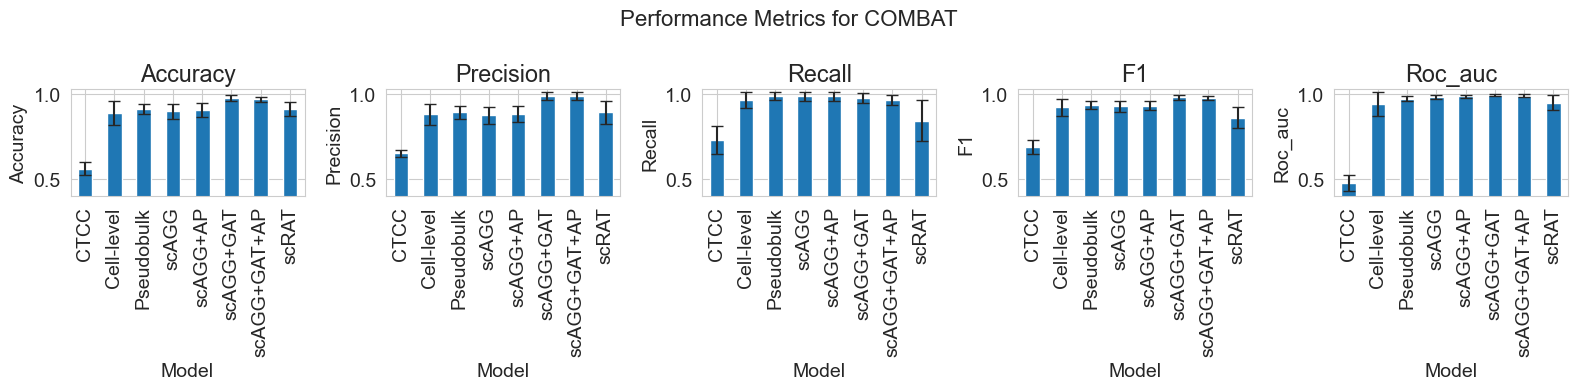

In [9]:
# Parse the performance data
df = parse_performance_json("COMBAT_top2000")

metrics = ["accuracy", "precision", "recall", "f1", "roc_auc"]
fig, axes = plt.subplots(1, 5, figsize=(16, 4), sharey=False)

for i, metric in enumerate(metrics):
    avg = df.groupby("model")[metric].mean()
    std = df.groupby("model")[metric].std()
    avg.plot(
        kind="bar",
        yerr=std,
        ax=axes[i],
        title=metric.capitalize(),
        capsize=4,
        legend=False
    )
    axes[i].set_ylabel(metric.capitalize())
    axes[i].set_xlabel("Model")

    axes[i].set_ylim(0.4, 1.03)  # ???? For COMBAT maybe?

plt.suptitle(f"Performance Metrics for COMBAT", fontsize=16)
plt.tight_layout()

plt.show()

Model: scAGG_rep1 -> 5 folds
Model: scAGG_rep2 -> 5 folds
Model: scAGG_rep3 -> 5 folds
Model: scAGG_rep4 -> 5 folds
Model: scAGG_rep5 -> 5 folds
Model: scAGG_split42 -> 5 folds
Model: scAGG_split43 -> 5 folds
Model: scAGG_split44 -> 5 folds
Model: scAGG_split45 -> 5 folds
Model: scAGG_split46 -> 5 folds


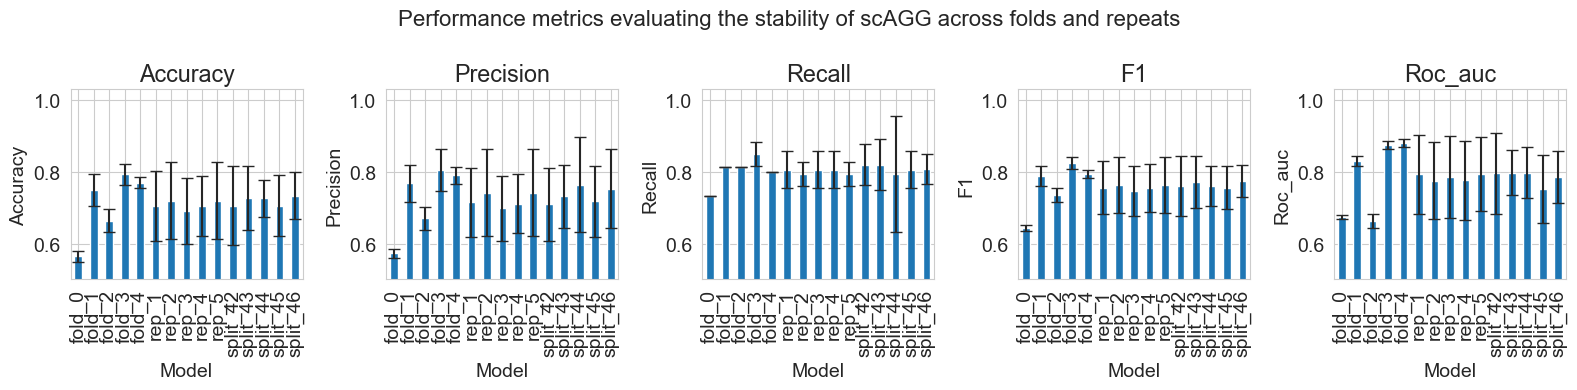

In [7]:
df = parse_performance_json("stability")

# also duplicate the rows with "rep" in the name, and swap model and fold columns (so we average over reps for each fold)

df_add = df[df["model"].str.contains("rep")].copy()
folds = df_add["fold"]
reps = df_add["model"].str.replace("scAGG_rep", "", regex=False).astype(int)
df_add["fold"] = reps
df_add["model"] = folds

# prepend "fold" to the model name
df_add["model"] = "fold_" + df_add["model"].astype(str)

df = pd.concat([df, df_add], axis=0)
df["model"] = df["model"].str.replace("scAGG_", "", regex=False)
df["model"] = df["model"].str.replace("rep", "rep_", regex=False)
df["model"] = df["model"].str.replace("split", "split_", regex=False)


metrics = ["accuracy", "precision", "recall", "f1", "roc_auc"]
fig, axes = plt.subplots(1, 5, figsize=(16, 4), sharey=False)

for i, metric in enumerate(metrics):
    avg = df.groupby("model")[metric].mean()
    std = df.groupby("model")[metric].std()
    avg.plot(
        kind="bar",
        yerr=std,
        ax=axes[i],
        title=metric.capitalize(),
        capsize=4,
        legend=False
    )
    axes[i].set_ylabel(metric.capitalize())
    axes[i].set_xlabel("Model")
    axes[i].set_ylim(0.5, 1.03)  # ???? For COMBAT maybe?

plt.suptitle(f"Performance metrics evaluating the stability of scAGG across folds and repeats", fontsize=16)
plt.tight_layout()
plt.show()


Model: Mathys -> 5 folds
Model: 1k_HVG -> 5 folds


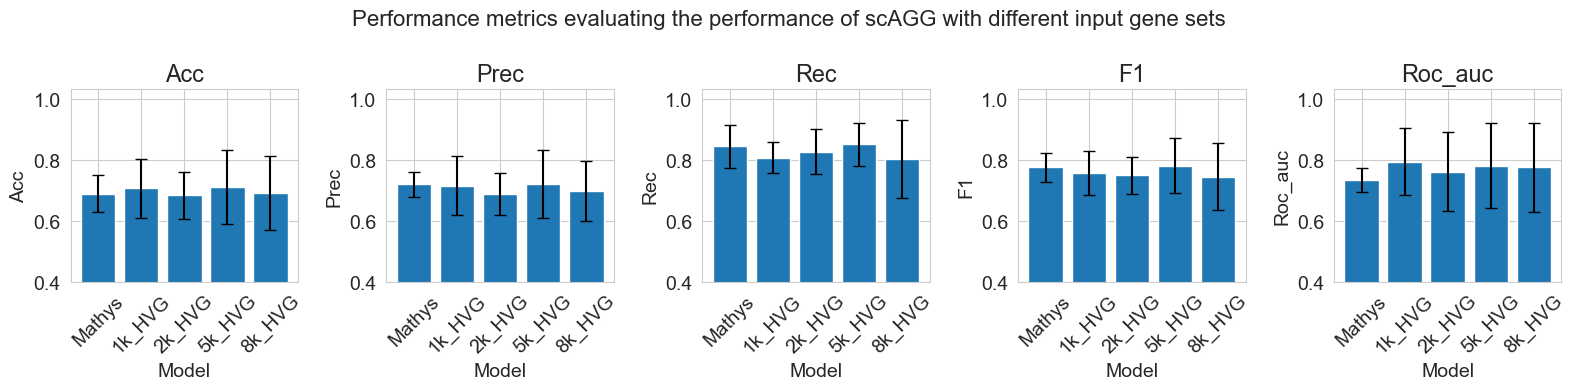

In [128]:
df = parse_performance_json("gene_set")

import matplotlib.pyplot as plt

# Models to plot
models = ["Mathys", "1k_HVG"]

# Metrics to plot
metrics = ["accuracy", "precision", "recall", "f1", "roc_auc"]

# Prepare mean and std for gene sets
gene_sets = {
    "2k_HVG": results_2k.loc[results_2k["Model"] == "scAGG"],
    "5k_HVG": results_5k.loc[results_5k["Model"] == "scAGG"],
    "8k_HVG": results_8k.loc[results_8k["Model"] == "scAGG"],
}

fig, axes = plt.subplots(1, len(metrics), figsize=(16, 4), sharey=False)

for i, metric in enumerate(metrics):
    # Collect means and stds for Mathys and 1k_HVG
    means = []
    stds = []
    labels = []
    for model in models:
        m = df[df["model"] == model][metric].mean()
        s = df[df["model"] == model][metric].std()
        means.append(m)
        stds.append(s)
        labels.append(model)
    # Add gene sets

    metric = metric.replace("accuracy", "Acc")
    metric = metric.replace("precision", "Prec")
    metric = metric.replace("recall", "Rec")
    
    for gs, gs_df in gene_sets.items():
        means.append(gs_df[metric.capitalize() if metric != "roc_auc" else "AUC"].values[0])
        stds.append(gs_df[metric.capitalize() + "_std" if metric != "roc_auc" else "AUC_std"].values[0])
        labels.append(gs)

    axes[i].bar(labels, means, yerr=stds, capsize=4)
    axes[i].set_title(metric.capitalize())
    axes[i].set_ylabel(metric.capitalize())
    axes[i].set_xlabel("Model")
    axes[i].set_ylim(0.4, 1.03)
    # rotate x-ticks for better readability
    axes[i].tick_params(axis='x', rotation=45)
    

plt.suptitle("Performance metrics evaluating the performance of scAGG with different input gene sets", fontsize=16)
plt.tight_layout()
plt.show()


In [144]:
# we want to export the results to a latex table. First, we combine the mean and std columns of each metric into a single string column, joining them by " ± "

def format_results_for_latex(df):
    df = df.copy()
    metrics = ["Acc", "Prec", "Rec", "F1", "AUC"]
    if "Acc" not in df.columns:
        metrics = ["Accuracy", "Precision", "Recall", "F1", "AUC"]
    for metric in metrics:
        df[metric] = pd.Series([f"{df[metric][i]:.3f} ± {df[f'{metric}_std'][i]:.3f}" for i in range(len(df))])
        df.drop(columns=[f"{metric}_std"], inplace=True)
    return df

format_results_for_latex(results_1k).drop(columns=["Genes"]).to_latex(
    "out/tables/results_1k.tex",
    index=False,
)




In [165]:
def format_results_for_latex_folds(df):

    # Same function, but now there is a folds column that we have to average over and take the std ourselves

    df = df.copy()
    metrics = ["accuracy", "precision", "recall", "f1", "roc_auc"]

    if df["fold"].nunique() == 1:
        # If there is only one fold, we use that value, and there is no std
        df.drop(columns=["fold"], inplace=True)
        return df

    for metric in metrics:
        # Calculate mean and std for each model
        df[metric + "_mean"] = df.groupby("model")[metric].transform("mean")
        df[metric + "_std"] = df.groupby("model")[metric].transform("std")

        # Format the mean and std into a single string
        df[metric] = df.apply(lambda row: f"{row[metric + '_mean']:.3f} ± {row[metric + '_std']:.3f}", axis=1)

        # Drop the mean and std columns
        df.drop(columns=[metric + "_mean", metric + "_std"], inplace=True)
    
    # Drop duplicates, keeping only the first occurrence (which now contains the formatted metrics)
    df = df.drop_duplicates(subset=["model"])
    df.drop(columns=["fold"], inplace=True)
    
    return df

format_results_for_latex_folds(df_seaad).to_latex(
    "out/tables/SeaAD.tex", index=False)

In [163]:
format_results_for_latex_folds(df_combat).to_latex(
    "out/tables/results_combat.tex", index=False)

In [162]:
format_results_for_latex(res_cts).to_latex(
    "out/tables/results_celltypes.tex", index=False)